In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gold_api = "https://api.nbp.pl/api/cenyzlota/"

In [3]:
def get_gold_info():
    dates = []
    prices = []
    for year in range(2022, 2024):
        for month in range(1, 13):
            start_date = f"{year}-{str(month).zfill(2)}-01"
            end_date = f"{year}-{str(month).zfill(2)}-28"
            url = f"{gold_api}{start_date}/{end_date}"
            
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                month_prices = [entry["cena"] for entry in data]
                avg_price = np.mean(month_prices)
                dates.append(f"{year}-{str(month).zfill(2)}")
                prices.append(avg_price)
            else:
                print(f"Nie udalo sie pobrac danych")

    return np.array(dates), np.array(prices)

In [4]:
get_gold_info()

(array(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
        '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
        '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
        '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
       dtype='<U7'),
 array([234.62263158, 238.583     , 271.232     , 266.52736842,
        262.74315789, 258.19578947, 261.458     , 264.24578947,
        257.753     , 263.0015    , 255.94722222, 255.56578947,
        264.88315789, 264.3045    , 268.4       , 272.45157895,
        267.23166667, 258.65157895, 251.6465    , 251.61473684,
        264.8765    , 261.5745    , 259.98789474, 259.52944444]))

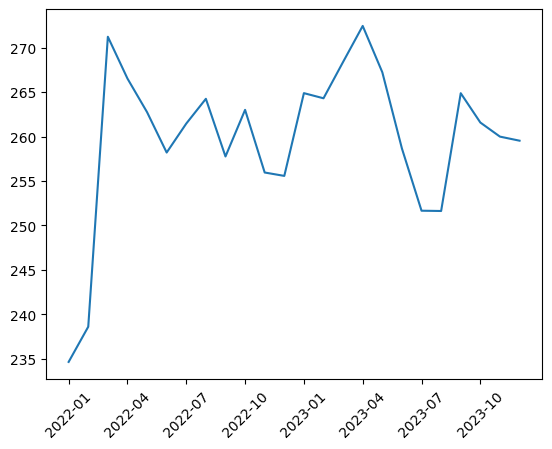

In [5]:
months, prices = get_gold_info()
plt.xticks(ticks=range(0, len(months), 3), labels=months[::3], rotation=45)
plt.plot(months, prices)

In [6]:
data = pd.read_csv('data.csv', delimiter=';', encoding='latin1')

In [7]:
data

,Nazwa zmiennej,Jednostka terytorialna,Sposob prezentacji,Rok,Miesiac,Wartosc,Flaga,Unnamed: 7,Unnamed: 8
0,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2024,1,"100,4",NaN,NaN,NaN
1,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2024,2,"100,7",NaN,NaN,NaN
2,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2024,3,"100,9",NaN,NaN,NaN
3,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2024,4,"102,0",NaN,NaN,NaN
4,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2024,5,"102,1",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2059,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,Analogiczny miesiÂ¥c poprzedniego roku = 100,1982,8,"214,9",NaN,NaN,NaN
2060,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,Analogiczny miesiÂ¥c poprzedniego roku = 100,1982,9,"208,5",NaN,NaN,NaN
2061,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,Analogiczny miesiÂ¥c poprzedniego roku = 100,1982,10,"201,0",NaN,NaN,NaN
2062,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,Analogiczny miesiÂ¥c poprzedniego roku = 100,1982,11,"197,9",NaN,NaN,NaN


In [8]:
data['Rok'] = data['Rok'].astype(int)
data['Miesiac'] = data['Miesiac'].astype(int)
data['Wartosc'] = data['Wartosc'].str.replace(',', '.').astype(float)

In [9]:
filtered_data = data[(data['Rok'] >= 2022) & (data['Rok'] <= 2023) & (data['Sposob prezentacji'] == 'A')]
filtered_data = filtered_data.sort_values(['Rok', 'Miesiac'])

In [10]:
filtered_data

,Nazwa zmiennej,Jednostka terytorialna,Sposob prezentacji,Rok,Miesiac,Wartosc,Flaga,Unnamed: 7,Unnamed: 8
120,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,1,101.9,NaN,NaN,NaN
121,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,2,101.6,NaN,NaN,NaN
122,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,3,104.9,NaN,NaN,NaN
123,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,4,107.0,NaN,NaN,NaN
124,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,5,108.8,NaN,NaN,NaN
125,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,6,110.4,NaN,NaN,NaN
126,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,7,110.9,NaN,NaN,NaN
127,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,8,111.8,NaN,NaN,NaN
128,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,9,113.6,NaN,NaN,NaN
129,WskaÂ«nik cen towarÂ¢w i usËug konsumpcyjnych,Polska,A,2022,10,115.6,NaN,NaN,NaN


In [11]:
grudzien_2022 = filtered_data[(filtered_data['Rok'] == 2022) & (filtered_data['Miesiac'] == 12)]['Wartosc'].values[0]
filtered_data.loc[filtered_data['Rok'] == 2023, 'Wartosc'] = (
    filtered_data.loc[filtered_data['Rok'] == 2023, 'Wartosc'] / 100 * grudzien_2022
)

In [12]:
grudzien_2022

np.float64(116.6)

In [13]:
months = filtered_data[['Rok', 'Miesiac']].apply(lambda x: f"{x['Rok']}-{str(x['Miesiac']).zfill(2)}", axis=1)
values = filtered_data['Wartosc']

In [14]:
months

120    2022-01
121    2022-02
122    2022-03
123    2022-04
124    2022-05
125    2022-06
126    2022-07
127    2022-08
128    2022-09
129    2022-10
130    2022-11
131    2022-12
60     2023-01
61     2023-02
62     2023-03
63     2023-04
64     2023-05
65     2023-06
66     2023-07
67     2023-08
68     2023-09
69     2023-10
70     2023-11
71     2023-12
dtype: object

In [15]:
values

120    101.9000
121    101.6000
122    104.9000
123    107.0000
124    108.8000
125    110.4000
126    110.9000
127    111.8000
128    113.6000
129    115.6000
130    116.4000
131    116.6000
60     119.5150
61     121.0308
62     122.3134
63     123.2462
64     123.2462
65     123.2462
66     123.0130
67     123.0130
68     122.5466
69     122.7798
70     123.7126
71     123.8292
Name: Wartosc, dtype: float64

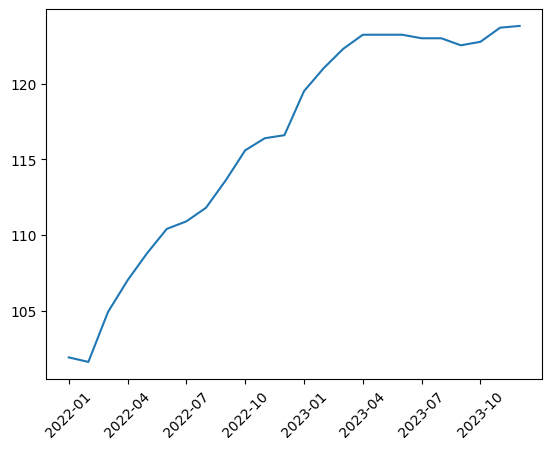

In [16]:
plt.xticks(ticks=range(0, len(months), 3), labels=months[::3], rotation=45)
plt.plot(months, values)

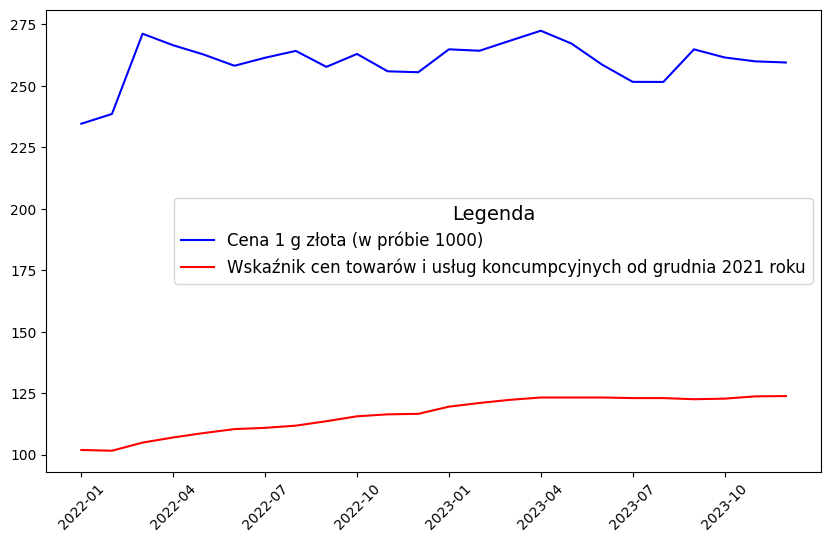

In [17]:
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(0, len(months), 3), labels=months[::3], rotation=45)
plt.plot(months, prices, label='Cena 1 g złota (w próbie 1000)', color='blue')
plt.plot(months, values, label='Wskaźnik cen towarów i usług koncumpcyjnych od grudnia 2021 roku', color='red')
plt.legend(title="Legenda", fontsize=12, title_fontsize=14, loc='best')

([<matplotlib.axis.XTick at 0x10c2ad700>,
 [Text(0, 0, '2022-01'),
  Text(3, 0, '2022-04'),
  Text(6, 0, '2022-07'),
  Text(9, 0, '2022-10'),
  Text(12, 0, '2023-01'),
  Text(15, 0, '2023-04'),
  Text(18, 0, '2023-07'),
  Text(21, 0, '2023-10')])

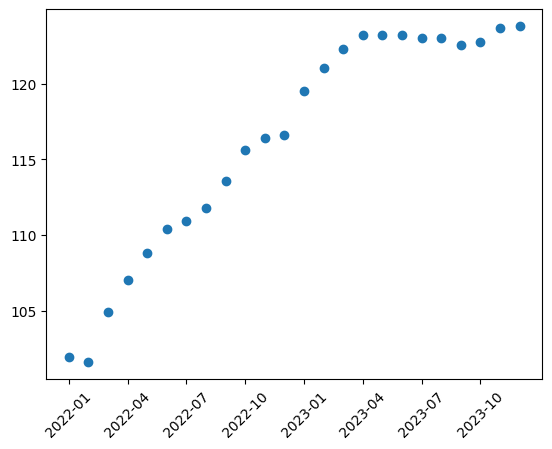

In [20]:
plt.scatter(months, values)
plt.xticks(ticks=range(0, len(months), 3), labels=months[::3], rotation=45)

In [36]:
x_train = np.array([i + 1 for i, _ in enumerate(months)])
y_train = np.array(values)

In [37]:
x_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [38]:
y_train

array([101.9   , 101.6   , 104.9   , 107.    , 108.8   , 110.4   ,
       110.9   , 111.8   , 113.6   , 115.6   , 116.4   , 116.6   ,
       119.515 , 121.0308, 122.3134, 123.2462, 123.2462, 123.2462,
       123.013 , 123.013 , 122.5466, 122.7798, 123.7126, 123.8292])

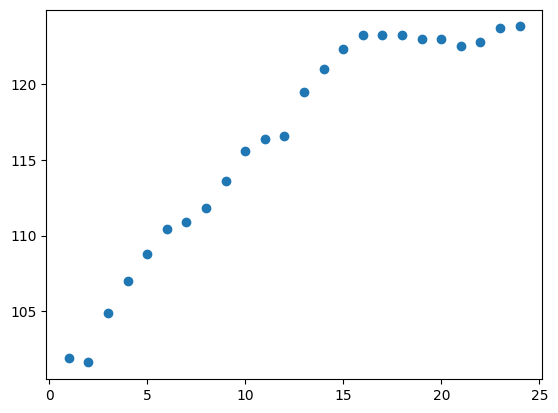

In [39]:
plt.scatter(x_train, y_train)

#### Computing the cost function $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 
* where
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$

In [40]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_sum = 0
    
    for i in range(m):
        fwb = w * x[i] + b
        total_sum += (fwb - y[i]) ** 2


    total_sum /= 2 * m

    return total_sum

Now, using gradient descent, we want to find w and b such that our cost function reaches the minimum possible value.
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

First, let's compute partial derivatives with respect to b and w:
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$

and
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
$$

$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
$$

In [41]:
def compute_derivatives(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        dj_db += (w * x[i] + b - y[i])
        dj_dw += ((w * x[i] + b) - y[i]) * x[i]

    dj_db /= m
    dj_dw /= m

    return dj_dw, dj_db

Now we have everything to start doing gradient descent

In [42]:
def gradient_descent(x, y, w, b, alpha, num_iters): 
    m = x.shape[0]
    cost_history = []
    w_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_derivatives(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        w_history.append(w)

    return w, b, cost_history, w_history

In [43]:
initial_w = 1
initial_b = 100

iterations = 1000
alpha = 0.0001

w,b,jh,wh = gradient_descent(x_train ,y_train, initial_w, initial_b, alpha, iterations)

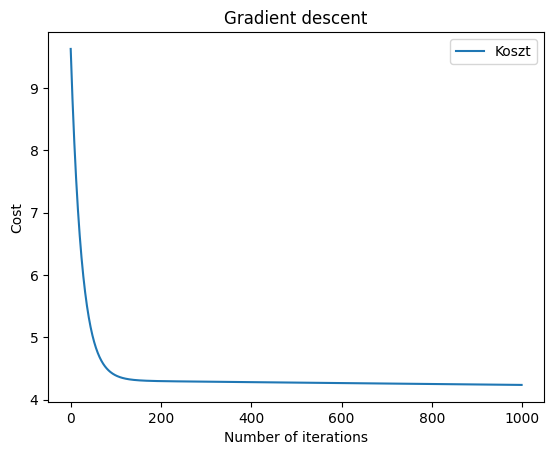

In [44]:
plt.plot(range(iterations), jh, label="Koszt")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Gradient descent")
plt.legend()
plt.show()

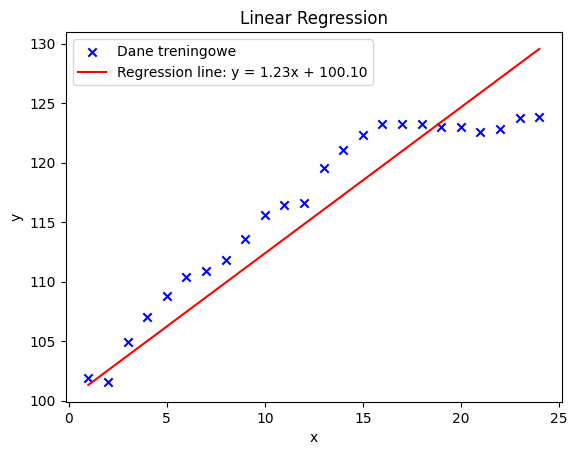

In [49]:
plt.scatter(x_train, y_train, color='blue', label='Dane treningowe', marker='x')

plt.plot(x_train, w * x_train + b, color='red', label=f'Regression line: y = {w:.2f}x + {b:.2f}')

plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Pokazanie wykresu
plt.show()

In [95]:
36*w + b

np.float64(144.26876042371697)

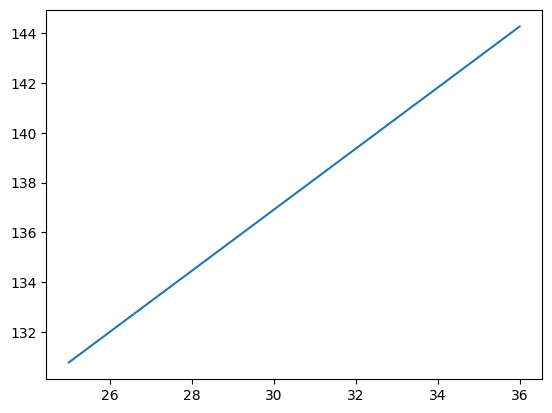

In [97]:
plt.plot(range(25,37), [i * w + b for i in range(25,37)], label="Koszt")